

# 📊 Outliers in Data

Outliers are data points that deviate strongly from the rest of the dataset.
They can be **useful signals** (e.g. extreme weather, holidays) or **errors** (e.g. faulty sensors). Detecting them is important before modeling.

---

In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [17]:
weather = pd.read_csv('data/weather_2022.csv',  delimiter=';', decimal='.', index_col = False)

weather['timestamp'] = pd.to_datetime(weather['Local time in Tallinn (airport)'], dayfirst=True)
weather.set_index('timestamp', inplace=True)
weather.drop(columns=['Local time in Tallinn (airport)'], inplace=True)

weather = weather.apply(pd.to_numeric, errors="ignore")
weather.head()

,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-12-31 23:00:00,5.8,744.1,747.2,-0.7,93.0,Wind blowing from the south-southwest,3.0,NaN,NaN,100%.,...,NaN,NaN,35.0,4.8,0.1,3.0,NaN,NaN,NaN,NaN
2022-12-31 22:00:00,5.9,744.3,747.3,-0.5,93.0,Wind blowing from the south-west,4.0,9.0,10.0,100%.,...,NaN,NaN,35.0,4.8,0.2,3.0,NaN,NaN,NaN,NaN
2022-12-31 21:00:00,5.8,744.4,747.4,-0.3,93.0,Wind blowing from the south-southwest,4.0,8.0,NaN,100%.,...,NaN,NaN,35.0,4.8,0.2,3.0,NaN,NaN,NaN,NaN
2022-12-31 20:00:00,5.7,744.8,747.8,-0.5,94.0,Wind blowing from the south-west,4.0,9.0,NaN,100%.,...,NaN,NaN,35.0,4.8,0.5,12.0,NaN,NaN,NaN,NaN
2022-12-31 19:00:00,5.4,744.8,747.9,-0.8,96.0,Wind blowing from the south-west,4.0,8.0,NaN,100%.,...,NaN,NaN,20.0,4.8,0.3,3.0,NaN,NaN,NaN,NaN


In [18]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8732 entries, 2022-12-31 23:00:00 to 2022-01-01 00:00:00
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       8732 non-null   float64
 1   Po      8732 non-null   float64
 2   P       8732 non-null   float64
 3   Pa      8624 non-null   float64
 4   U       8685 non-null   float64
 5   DD      8720 non-null   object 
 6   Ff      8721 non-null   float64
 7   ff10    1305 non-null   float64
 8   ff3     2404 non-null   float64
 9   N       8607 non-null   object 
 10  WW      8732 non-null   object 
 11  W1      8653 non-null   object 
 12  W2      8650 non-null   object 
 13  Tn      8649 non-null   float64
 14  Tx      8649 non-null   float64
 15  Cl      2612 non-null   object 
 16  Nh      6289 non-null   object 
 17  H       6521 non-null   object 
 18  Cm      2120 non-null   object 
 19  Ch      2091 non-null   object 
 20  VV      8682 non-null   float64
 21  T

## 1️⃣ First look at the dataset

Use `.describe()` to see the main statistics:


* `count` → number of observations
* `mean` / `std` → average and spread
* `min` / `max` → extremes (possible outliers)
* `25% / 50% / 75%` → quartiles (used in boxplots)

---

In [4]:
print(weather.describe())

                 T           Po            P           Pa            U  \
count  8732.000000  8732.000000  8732.000000  8624.000000  8685.000000   
mean      7.148465   756.759116   759.825973     0.001020    78.729303   
std       8.622924     9.152670     9.185894     1.064299    16.945406   
min     -16.700000   717.700000   720.700000    -6.900000    14.000000   
25%       0.300000   752.175000   755.200000    -0.500000    67.000000   
50%       6.700000   757.900000   760.900000     0.000000    84.000000   
75%      13.000000   762.000000   765.100000     0.500000    93.000000   
max      32.000000   783.100000   786.300000     9.000000   100.000000   

                Ff         ff10          ff3           Tn           Tx  \
count  8721.000000  1305.000000  2404.000000  8649.000000  8649.000000   
mean      3.014219     9.702682    10.350666     4.446549     9.961510   
std       1.577299     2.169688     2.281426     7.774611     9.296164   
min       0.000000     1.000000     1

## 2️⃣ Visualize distributions with histograms

Histograms help spot unusual spikes or extreme values:

👉 Look for very long tails or isolated bars.

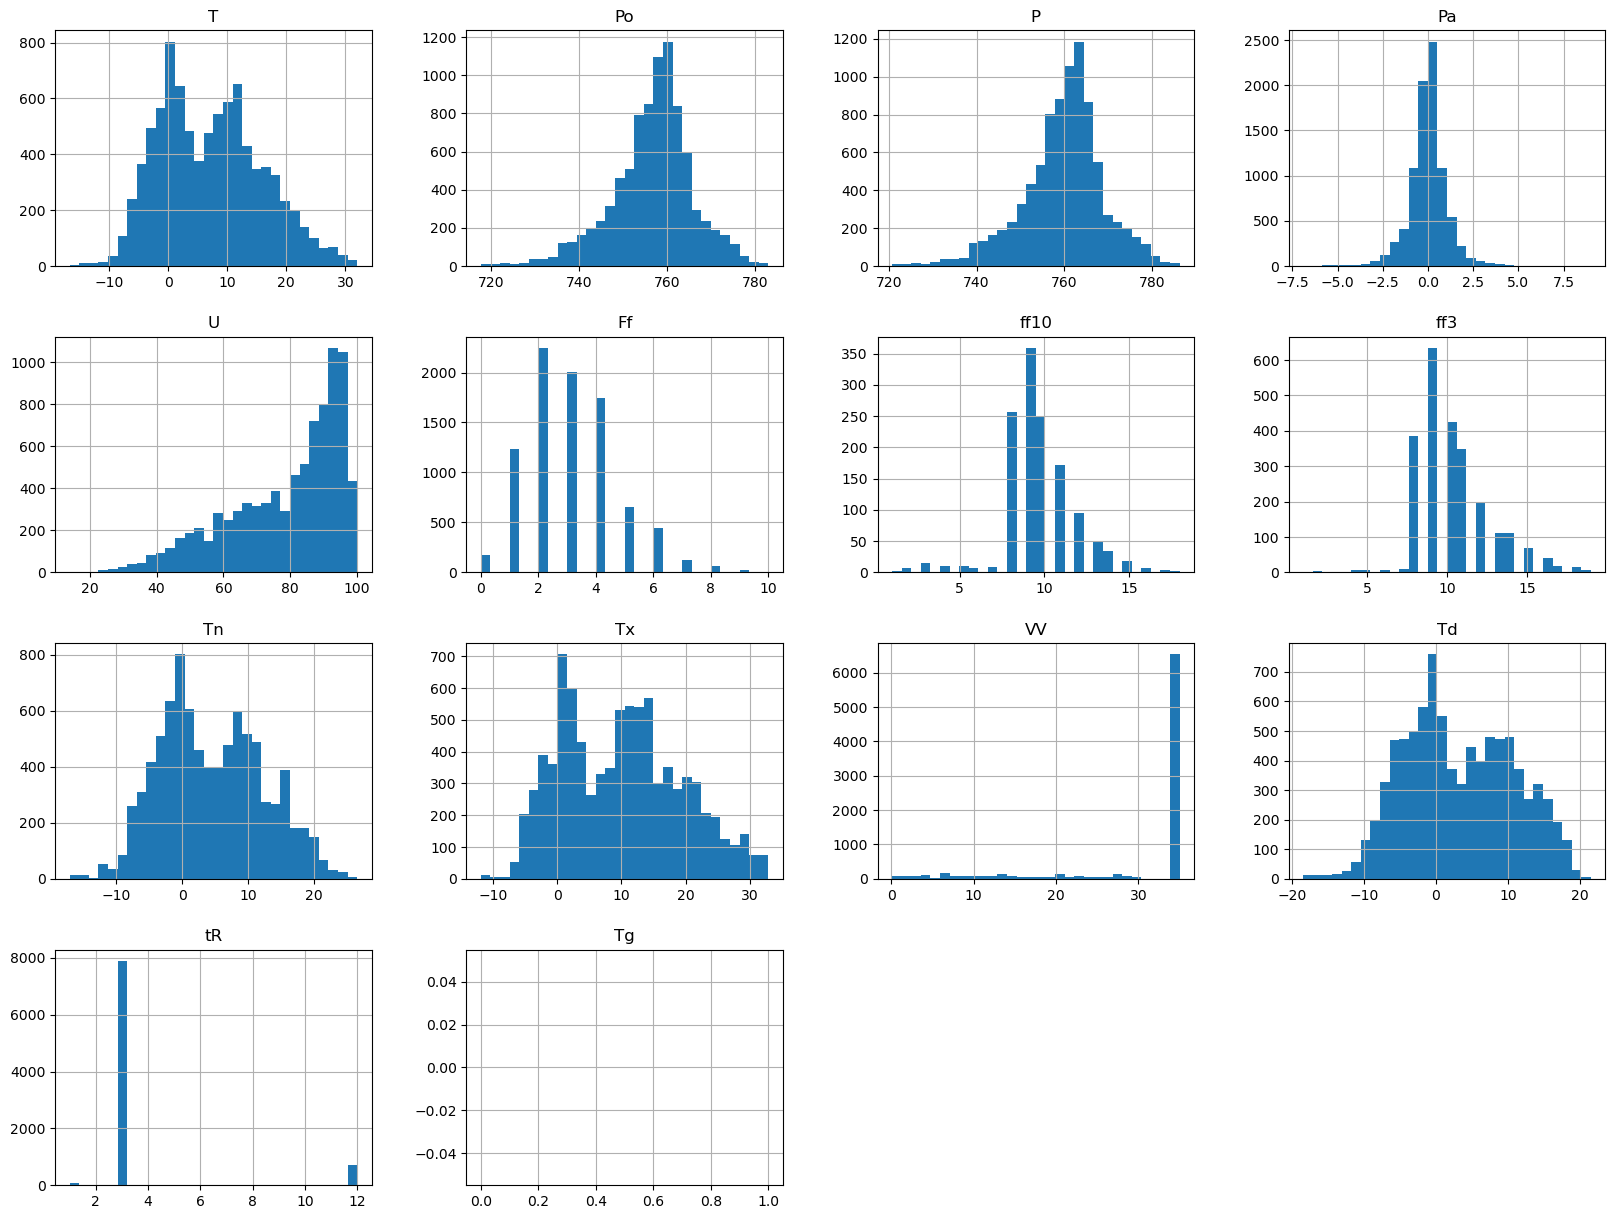

In [5]:
from math import ceil

weather.hist(bins=30, figsize=(20, 15))
plt.show()

---

## 3️⃣ Boxplots for systematic detection

Boxplots show quartiles and highlight outliers as points beyond the whiskers.



* Middle box = interquartile range (IQR)
* Whiskers = typical spread
* Dots beyond whiskers = potential outliers

---

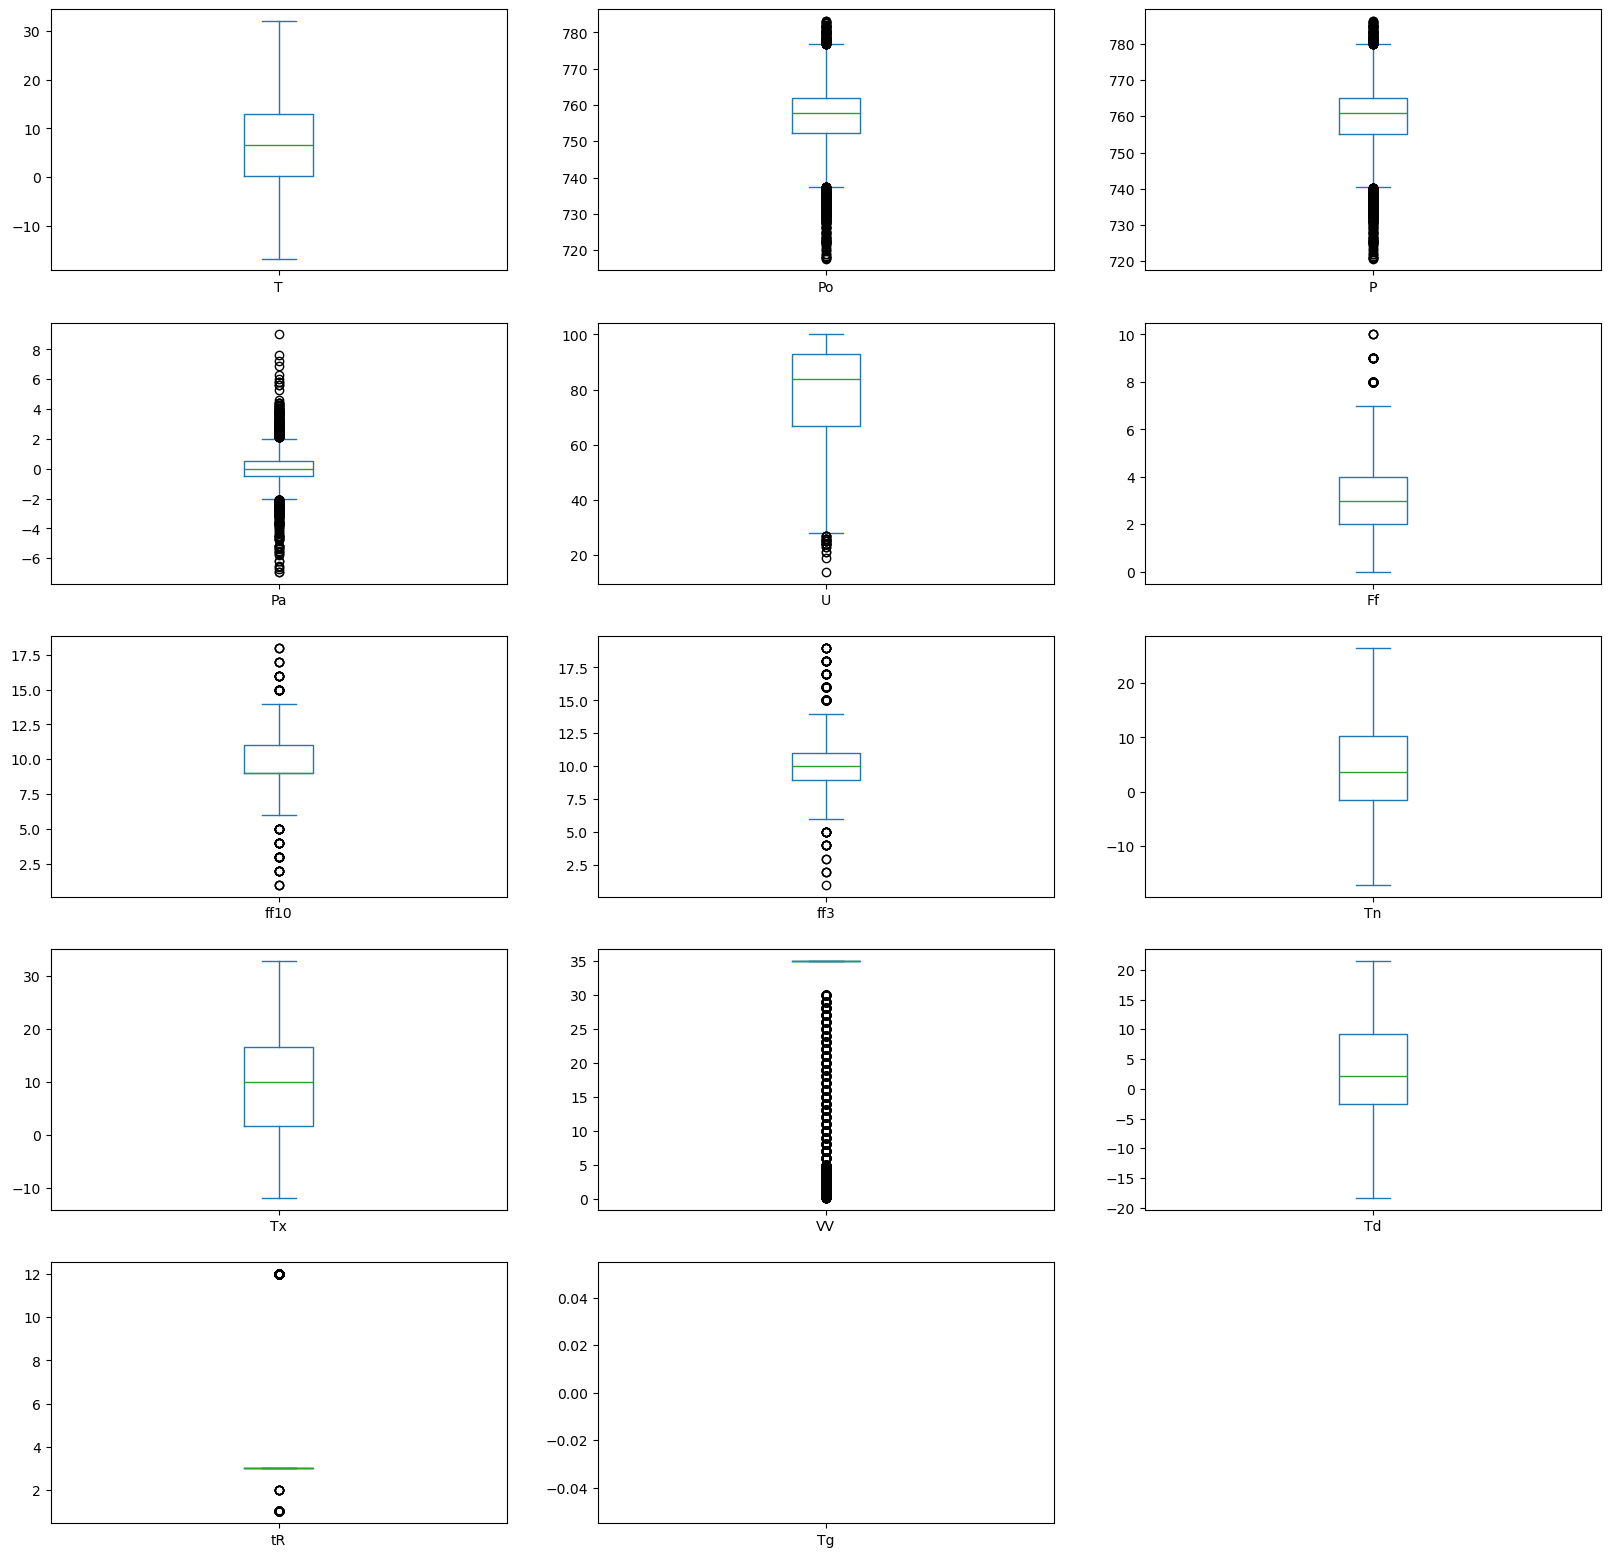

In [7]:
weather.plot(kind='box', subplots=True, layout=(ceil(len(weather.columns)/3), 3), figsize=(20,40))
plt.show()

## 4️⃣ Types of outliers

### 🔹 Logical outliers

These are **extreme but valid events** that happen naturally and reflect real-world phenomena.

* **Examples in weather/energy data:**

  * A heatwave in midsummer that pushes temperatures way above the usual range.
  * Sudden drops in electricity demand on public holidays like Christmas or New Year’s Eve.
    
* **Why they matter:**

  * They’re not errors — they carry valuable information about unusual but real situations.
  * Depending on your analysis, you may **keep them** (e.g. if forecasting peak demand) or **treat them separately** (e.g. exclude holidays when training a “normal-day” model).

---

### 🔹 Errors (data quality issues)

These outliers come from **faulty measurement, logging, or transmission** problems.

* **Examples:**

  * Negative precipitation values (impossible in reality).
  * Sudden spikes because a sensor froze or restarted.
  * Missing units or wrongly scaled inputs (e.g. temperature logged in °F instead of °C for one day).
    
* **Why they matter:**

  * These must **be corrected or removed**, because they don’t represent reality.
  * If left in, they can mislead models and skew statistics (mean, standard deviation, regression coefficients).

---

### 🔹 Statistical outliers

These are points flagged as unusual purely by statistical rules, without immediate context.

* **How to detect:**

  * **IQR rule (boxplot method):**
    A value is an outlier if it lies below `Q1 - 1.5*IQR` or above `Q3 + 1.5*IQR`.
  * **Z-score method:**
    A value more than 3 standard deviations from the mean.
    
* **Examples:**

  * A temperature of 40 °C in a dataset where most days are 15–25 °C.
  * A household’s electricity demand of 200 kWh/day when typical is 10–20 kWh/day.
* **Why they matter:**

  * They are “flagged” but not automatically errors — context is key.
  * May overlap with logical outliers (heatwave) or errors (faulty sensor).
  * Often used as a **first-pass filter** to highlight candidates for closer inspection.

---

✅ **Summary:**

* Logical outliers = real but unusual → often keep.
* Errors = invalid → fix/remove.
* Statistical outliers = suspicious by rules → need domain knowledge to classify.

---

## 5️⃣ Using Seaborn for a focused boxplot

Example with one variable. 

👉 Easy to see how many values lie far beyond the “typical” whiskers.

In [8]:
prices = pd.read_csv('data/electricity-nps price_2022.csv',  delimiter=';',decimal=',')
prices['timestamp'] = pd.to_datetime(prices['Kuupaev (Eesti aeg)'], dayfirst=True)
prices.head()

,Ajatempel (UTC),Kuupaev (Eesti aeg),NPS Lati,NPS Leedu,NPS Soome,NPS Eesti,timestamp
0,1640988000,01.01.2022 00:00,57.98,57.98,29.76,57.98,2022-01-01 00:00:00
1,1640991600,01.01.2022 01:00,50.05,50.05,46.60,50.05,2022-01-01 01:00:00
2,1640995200,01.01.2022 02:00,41.33,41.33,41.33,41.33,2022-01-01 02:00:00
3,1640998800,01.01.2022 03:00,42.18,42.18,42.18,42.18,2022-01-01 03:00:00
4,1641002400,01.01.2022 04:00,44.37,44.37,44.37,44.37,2022-01-01 04:00:00


In [9]:
pr = prices[['timestamp', 'NPS Eesti']]
pr.set_index('timestamp', inplace=True)
pr = pr.rename(columns = {'NPS Eesti':'value'})
pr.head()

,value
timestamp,
2022-01-01 00:00:00,57.98
2022-01-01 01:00:00,50.05
2022-01-01 02:00:00,41.33
2022-01-01 03:00:00,42.18
2022-01-01 04:00:00,44.37


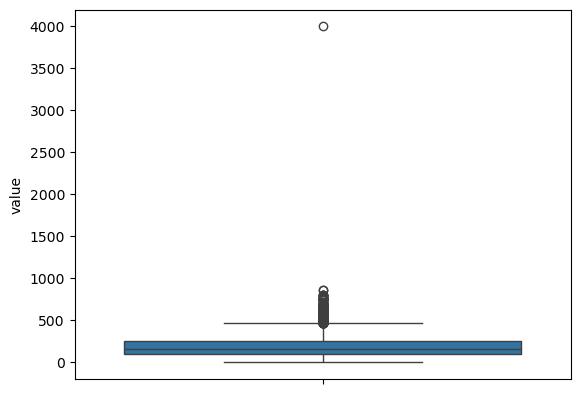

In [10]:
sns.boxplot(pr['value']);

In [11]:
pd.Series(pr['value']).describe()

count    8760.000000
mean      192.824273
std       135.649117
min        -0.040000
25%       104.420000
50%       160.735000
75%       249.415000
max      4000.000000
Name: value, dtype: float64

---

## 🔑 Takeaways

* Always combine **statistics** (`.describe()`) and **visualizations**.
* Decide if outliers are **real signals** (keep them) or **errors** (fix/remove).
* Document your reasoning — handling outliers depends on your problem (e.g. for energy forecasting, a Christmas outlier might be crucial!).



# 🧹 Removing Outliers with the IQR Rule

The **interquartile range (IQR)** is defined as:

$$
IQR = Q3 - Q1
$$

* Anything below **Q1 − 1.5 × IQR** or above **Q3 + 1.5 × IQR** is flagged as an outlier.



---

## Example

In [23]:
Q1 = pr['value'].quantile(0.25)
Q3 = pr['value'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

filtered = pr[
    (pr['value'] >= lower) &
    (pr['value'] <= upper)
]

print("Original size:", len(pr))
print("After removing outliers:", len(filtered))

Original size: 8760
After removing outliers: 8334


---

##  Visual check

Before and after boxplots to confirm effect.

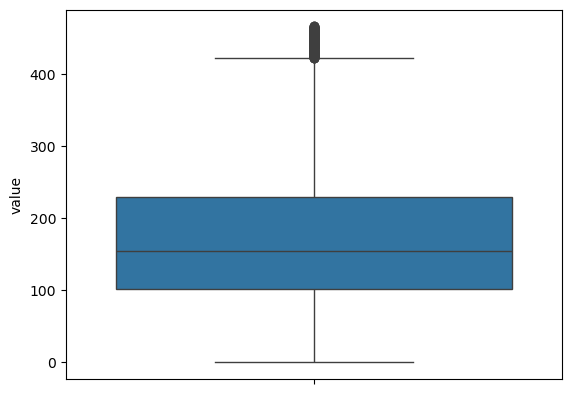

In [25]:
sns.boxplot(filtered['value']);

---

## ⚠️ Caution

* IQR filtering is **conservative** but can still remove meaningful “logical outliers” (e.g., real holiday demand spikes).
* Always combine **statistics + domain knowledge** before deciding to drop data.


# 🔢 Outlier Detection with Z-scores

The **Z-score** standardizes each value relative to the mean and standard deviation:

$$
Z = \frac{x - \mu}{\sigma}
$$

* Values with |Z| > 3 are often considered outliers (you can adjust the threshold).
* Works best if the data is roughly normal (bell-shaped).

---

## Example

In [27]:
mean = pr['value'].mean()
std = pr['value'].std()

z_scores = (pr['value'] - mean) / std

# Keep only values with |z| <= 3
filtered2 = pr[abs(z_scores) <= 3]

print("Original size:", len(pr))
print("After removing outliers:", len(filtered2))

Original size: 8760
After removing outliers: 8675


---

##  Visual check

Before and after boxplots to confirm effect.

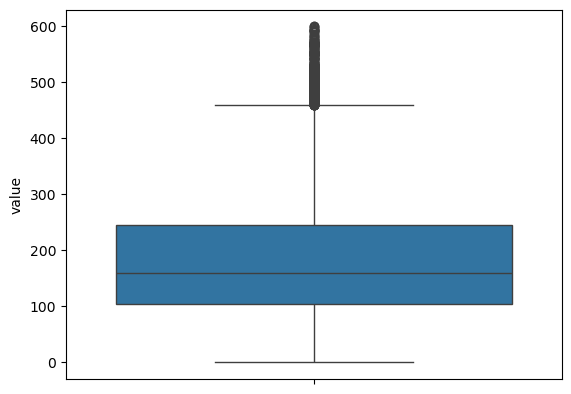

In [28]:
sns.boxplot(filtered2['value']);


# ⚖️ IQR vs. Z-score

* **IQR rule**:

  * More robust to skewed distributions.
  * Good default for mixed data.

* **Z-score rule**:

  * Simpler, intuitive.
  * Best if data is symmetric/normal.
  * Sensitive to extreme outliers (can distort mean/std).

